<a href="https://pandas.pydata.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" title="pandas" alt="pandas"></a>

# Introduction to pandas

Some first pandas steps

In [69]:
import numpy as np
import pandas as pd

# Object creation

Creating a Series by passing a list of values, letting pandas create a default integer index

In [70]:
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns

In [71]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [72]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.434989,-0.026350,-0.995608,0.667271
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,-0.924559,1.076155,1.143442,0.354311
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397
2013-01-05,-0.872448,0.651137,0.123851,-0.759447
2013-01-06,-1.472568,0.070972,0.533528,0.282420


Creating a DataFrame by passing a dict of objects that can be converted to series-like

In [73]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes

In [74]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

Here is how to view the top and bottom rows of the frame

In [75]:
df.head()

,A,B,C,D
2013-01-01,-0.434989,-0.026350,-0.995608,0.667271
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,-0.924559,1.076155,1.143442,0.354311
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397
2013-01-05,-0.872448,0.651137,0.123851,-0.759447


In [76]:
df.tail()

,A,B,C,D
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,-0.924559,1.076155,1.143442,0.354311
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397
2013-01-05,-0.872448,0.651137,0.123851,-0.759447
2013-01-06,-1.472568,0.070972,0.533528,0.282420


Display the index, columns

In [77]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [78]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data

In [79]:
df.to_numpy()

array([[-0.43498852, -0.02635042, -0.99560754,  0.66727133],
       [ 0.1602463 ,  1.47327241,  1.04477398,  0.85990961],
       [-0.92455918,  1.07615467,  1.14344196,  0.3543112 ],
       [-0.49770469, -0.08834458,  0.06115115, -0.14439739],
       [-0.87244831,  0.6511368 ,  0.12385088, -0.75944683],
       [-1.47256769,  0.07097246,  0.53352755,  0.28241958]])

describe() shows a quick statistic summary of your data

In [80]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.673670,0.526140,0.318523,0.210011
std,0.552095,0.648878,0.785523,0.587022
min,-1.472568,-0.088345,-0.995608,-0.759447
25%,-0.911531,-0.002020,0.076826,-0.037693
50%,-0.685077,0.361055,0.328689,0.318365
75%,-0.450668,0.969900,0.916962,0.589031
max,0.160246,1.473272,1.143442,0.859910


Transposing your data

In [81]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.434989,0.160246,-0.924559,-0.497705,-0.872448,-1.472568
B,-0.026350,1.473272,1.076155,-0.088345,0.651137,0.070972
C,-0.995608,1.044774,1.143442,0.061151,0.123851,0.533528
D,0.667271,0.859910,0.354311,-0.144397,-0.759447,0.282420


Sorting by an axis

In [82]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.667271,-0.995608,-0.026350,-0.434989
2013-01-02,0.859910,1.044774,1.473272,0.160246
2013-01-03,0.354311,1.143442,1.076155,-0.924559
2013-01-04,-0.144397,0.061151,-0.088345,-0.497705
2013-01-05,-0.759447,0.123851,0.651137,-0.872448
2013-01-06,0.282420,0.533528,0.070972,-1.472568


Sorting by values

In [83]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397
2013-01-01,-0.434989,-0.026350,-0.995608,0.667271
2013-01-06,-1.472568,0.070972,0.533528,0.282420
2013-01-05,-0.872448,0.651137,0.123851,-0.759447
2013-01-03,-0.924559,1.076155,1.143442,0.354311
2013-01-02,0.160246,1.473272,1.044774,0.859910


# Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [84]:
df['A']

2013-01-01   -0.434989
2013-01-02    0.160246
2013-01-03   -0.924559
2013-01-04   -0.497705
2013-01-05   -0.872448
2013-01-06   -1.472568
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows

In [85]:
df[0:3]

,A,B,C,D
2013-01-01,-0.434989,-0.026350,-0.995608,0.667271
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,-0.924559,1.076155,1.143442,0.354311


In [86]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,-0.924559,1.076155,1.143442,0.354311
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397


# Selection by label

For getting a cross section using a label

In [87]:
df.loc[dates[0]]

A   -0.434989
B   -0.026350
C   -0.995608
D    0.667271
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [88]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.434989,-0.026350
2013-01-02,0.160246,1.473272
2013-01-03,-0.924559,1.076155
2013-01-04,-0.497705,-0.088345
2013-01-05,-0.872448,0.651137
2013-01-06,-1.472568,0.070972


Showing label slicing, both endpoints are included

In [89]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.160246,1.473272
2013-01-03,-0.924559,1.076155
2013-01-04,-0.497705,-0.088345


Reduction in the dimensions of the returned object

In [90]:
df.loc['20130102', ['A', 'B']]

A    0.160246
B    1.473272
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [91]:
df.loc[dates[0], 'A']

-0.4349885211732006

For getting fast access to a scalar (equivalent to the prior method)

In [92]:
df.at[dates[0], 'A']

-0.4349885211732006

# Selection by position


Select via the position of the passed integers

In [93]:
df.iloc[3]

A   -0.497705
B   -0.088345
C    0.061151
D   -0.144397
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [94]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.497705,-0.088345
2013-01-05,-0.872448,0.651137


By lists of integer position locations, similar to the numpy/python style

In [95]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.160246,1.044774
2013-01-03,-0.924559,1.143442
2013-01-05,-0.872448,0.123851


For slicing rows explicitly

In [96]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,-0.924559,1.076155,1.143442,0.354311


For slicing columns explicitly

In [97]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.026350,-0.995608
2013-01-02,1.473272,1.044774
2013-01-03,1.076155,1.143442
2013-01-04,-0.088345,0.061151
2013-01-05,0.651137,0.123851
2013-01-06,0.070972,0.533528


For getting a value explicitly

In [98]:
df.iloc[1, 1]

1.4732724094414618

For getting fast access to a scalar (equivalent to the prior method)

In [99]:
df.iat[1, 1]

1.4732724094414618

# Boolean indexing

Using a single column’s values to select data

In [100]:
df[df['A'] > 0]

,A,B,C,D
2013-01-02,0.160246,1.473272,1.044774,0.85991


Selecting values from a DataFrame where a boolean condition is met

In [101]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.667271
2013-01-02,0.160246,1.473272,1.044774,0.859910
2013-01-03,NaN,1.076155,1.143442,0.354311
2013-01-04,NaN,NaN,0.061151,NaN
2013-01-05,NaN,0.651137,0.123851,NaN
2013-01-06,NaN,0.070972,0.533528,0.282420


Using the isin() method for filtering

In [102]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.434989,-0.026350,-0.995608,0.667271,one
2013-01-02,0.160246,1.473272,1.044774,0.859910,one
2013-01-03,-0.924559,1.076155,1.143442,0.354311,two
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397,three
2013-01-05,-0.872448,0.651137,0.123851,-0.759447,four
2013-01-06,-1.472568,0.070972,0.533528,0.282420,three


In [103]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.924559,1.076155,1.143442,0.354311,two
2013-01-05,-0.872448,0.651137,0.123851,-0.759447,four


# Setting

Setting a new column automatically aligns the data by the indexes

In [104]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [105]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.434989,-0.026350,-0.995608,0.667271,NaN
2013-01-02,0.160246,1.473272,1.044774,0.859910,1.0
2013-01-03,-0.924559,1.076155,1.143442,0.354311,2.0
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397,3.0
2013-01-05,-0.872448,0.651137,0.123851,-0.759447,4.0
2013-01-06,-1.472568,0.070972,0.533528,0.282420,5.0


Setting values by label

In [106]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.026350,-0.995608,0.667271,NaN
2013-01-02,0.160246,1.473272,1.044774,0.859910,1.0
2013-01-03,-0.924559,1.076155,1.143442,0.354311,2.0
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397,3.0
2013-01-05,-0.872448,0.651137,0.123851,-0.759447,4.0
2013-01-06,-1.472568,0.070972,0.533528,0.282420,5.0


Setting values by position

In [107]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.995608,0.667271,NaN
2013-01-02,0.160246,1.473272,1.044774,0.859910,1.0
2013-01-03,-0.924559,1.076155,1.143442,0.354311,2.0
2013-01-04,-0.497705,-0.088345,0.061151,-0.144397,3.0
2013-01-05,-0.872448,0.651137,0.123851,-0.759447,4.0
2013-01-06,-1.472568,0.070972,0.533528,0.282420,5.0


Setting by assigning with a NumPy array

In [108]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.995608,5,NaN
2013-01-02,0.160246,1.473272,1.044774,5,1.0
2013-01-03,-0.924559,1.076155,1.143442,5,2.0
2013-01-04,-0.497705,-0.088345,0.061151,5,3.0
2013-01-05,-0.872448,0.651137,0.123851,5,4.0
2013-01-06,-1.472568,0.070972,0.533528,5,5.0


A where operation with setting

In [109]:
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.995608,5,NaN
2013-01-02,0.160246,1.473272,1.044774,5,1.0
2013-01-03,-0.924559,1.076155,1.143442,5,2.0
2013-01-04,-0.497705,-0.088345,0.061151,5,3.0
2013-01-05,-0.872448,0.651137,0.123851,5,4.0
2013-01-06,-1.472568,0.070972,0.533528,5,5.0


In [110]:
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.995608,-5,NaN
2013-01-02,-0.160246,-1.473272,-1.044774,-5,-1.0
2013-01-03,-0.924559,-1.076155,-1.143442,-5,-2.0
2013-01-04,-0.497705,-0.088345,-0.061151,-5,-3.0
2013-01-05,-0.872448,-0.651137,-0.123851,-5,-4.0
2013-01-06,-1.472568,-0.070972,-0.533528,-5,-5.0


# Missing data

Reindexing allows you to change, add and delete the index on a specified axis. This returns a copy of the data.

In [115]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.995608,5,NaN,1.0
2013-01-02,0.160246,1.473272,1.044774,5,1.0,1.0
2013-01-03,-0.924559,1.076155,1.143442,5,2.0,NaN
2013-01-04,-0.497705,-0.088345,0.061151,5,3.0,NaN


To drop any rows that have missing data

In [123]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.160246,1.473272,1.044774,5,1.0,1.0


Filling missing data

In [124]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.995608,5,5.0,1.0
2013-01-02,0.160246,1.473272,1.044774,5,1.0,1.0
2013-01-03,-0.924559,1.076155,1.143442,5,2.0,5.0
2013-01-04,-0.497705,-0.088345,0.061151,5,3.0,5.0


To get the boolean mask where values are nan

In [126]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.995608,5,NaN,1.0
2013-01-02,0.160246,1.473272,1.044774,5,1.0,1.0
2013-01-03,-0.924559,1.076155,1.143442,5,2.0,NaN
2013-01-04,-0.497705,-0.088345,0.061151,5,3.0,NaN


In [127]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

Performing a descriptive statistic

In [129]:
df.mean()

A   -0.601172
B    0.530532
C    0.318523
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [130]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.995608,5,NaN
2013-01-02,0.160246,1.473272,1.044774,5,1.0
2013-01-03,-0.924559,1.076155,1.143442,5,2.0
2013-01-04,-0.497705,-0.088345,0.061151,5,3.0
2013-01-05,-0.872448,0.651137,0.123851,5,4.0
2013-01-06,-1.472568,0.070972,0.533528,5,5.0


In [136]:
df.mean(axis=1, skipna=False)

2013-01-01         NaN
2013-01-02    1.735659
2013-01-03    1.659007
2013-01-04    1.495020
2013-01-05    1.780508
2013-01-06    1.826386
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [137]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [140]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.924559,0.076155,0.143442,4.0,1.0
2013-01-04,-3.497705,-3.088345,-2.938849,2.0,0.0
2013-01-05,-5.872448,-4.348863,-4.876149,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

Applying functions to the data

In [142]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.995608,5,NaN
2013-01-02,0.160246,1.473272,0.049166,10,1.0
2013-01-03,-0.764313,2.549427,1.192608,15,3.0
2013-01-04,-1.262018,2.461082,1.253760,20,6.0
2013-01-05,-2.134466,3.112219,1.377610,25,10.0
2013-01-06,-3.607034,3.183192,1.911138,30,15.0


In [143]:
df.apply(lambda x: x.max() - x.min())

A    1.632814
B    1.561617
C    2.139050
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [144]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    3
3    4
4    0
5    1
6    3
7    5
8    6
9    3
dtype: int64

In [145]:
s.value_counts()

3    3
0    3
6    1
5    1
4    1
1    1
dtype: int64

## String methods

In [146]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [150]:
s[3:5].str.lower()

3    aaba
4    baca
dtype: object

# Merge

## Concat

Concatenating pandas objects together with concat()

In [151]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.465922,0.030999,1.865329,-0.065460
1,0.934553,1.173160,0.247446,0.587381
2,-1.177194,0.758278,0.316999,1.270319
3,0.718085,0.282692,2.731167,-0.296870
4,1.069330,-0.494717,2.694757,0.232159
5,-1.936111,-0.351098,-0.379672,0.299696
6,-0.901099,0.728689,1.412266,0.875466
7,0.500899,0.603531,0.299594,-0.710936
8,0.670944,-0.912419,1.371251,1.253135
9,-0.263425,1.342172,0.822059,0.150216


In [156]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [157]:
pd.concat(pieces)

,0,1,2,3
0,-1.465922,0.030999,1.865329,-0.065460
1,0.934553,1.173160,0.247446,0.587381
2,-1.177194,0.758278,0.316999,1.270319
3,0.718085,0.282692,2.731167,-0.296870
4,1.069330,-0.494717,2.694757,0.232159
5,-1.936111,-0.351098,-0.379672,0.299696
6,-0.901099,0.728689,1.412266,0.875466
7,0.500899,0.603531,0.299594,-0.710936
8,0.670944,-0.912419,1.371251,1.253135
9,-0.263425,1.342172,0.822059,0.150216


## Join

SQL style merges

In [159]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [160]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [161]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is

In [162]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [163]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [164]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

By “group by” we are referring to a process involving one or more of the following steps:

*   Splitting the data into groups based on some criteria
*   Applying a function to each group independently
*   Combining the results into a data structure



In [167]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.326331,-0.462138
1,bar,one,0.520001,-1.373775
2,foo,two,-1.572274,-1.746022
3,bar,three,-0.846612,-0.002431
4,foo,two,-0.733893,-0.689534
5,bar,two,0.525422,0.670430
6,foo,one,-0.393620,-1.982077
7,foo,three,0.425751,1.475336


Grouping and then applying the sum() function to the resulting groups

In [168]:
df.groupby('A').sum()

,C,D
A,,
bar,0.198811,-0.705776
foo,-3.600368,-3.404434


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function

In [171]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.520001 -1.373775
    three -0.846612 -0.002431
    two    0.525422  0.670430
foo one   -1.719951 -2.444215
    three  0.425751  1.475336
    two   -2.306167 -2.435556

# Reshaping

## Stack

In [172]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [174]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [175]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -2.099009  0.193420
      two    -0.280431 -0.785372
baz   one     1.657716 -0.369525
      two     0.608938 -2.272684
foo   one     0.530632 -0.743140
      two    -0.716232  0.989137
qux   one     0.817428  0.021547
      two     0.417217  1.365697

In [176]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -2.099009  0.193420
      two    -0.280431 -0.785372
baz   one     1.657716 -0.369525
      two     0.608938 -2.272684

The stack() method “compresses” a level in the DataFrame’s columns

In [177]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -2.099009
               B    0.193420
       two     A   -0.280431
               B   -0.785372
baz    one     A    1.657716
               B   -0.369525
       two     A    0.608938
               B   -2.272684
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level

In [178]:
stacked.unstack()

A         B
first second                    
bar   one    -2.099009  0.193420
      two    -0.280431 -0.785372
baz   one     1.657716 -0.369525
      two     0.608938 -2.272684

In [181]:
stacked.unstack(1)

second        one       two
first                      
bar   A -2.099009 -0.280431
      B  0.193420 -0.785372
baz   A  1.657716  0.608938
      B -0.369525 -2.272684

In [182]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -2.099009  1.657716
       B  0.193420 -0.369525
two    A -0.280431  0.608938
       B -0.785372 -2.272684

## Pivot tables

In [183]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.342969,0.957721
1,one,B,foo,-0.968100,1.700260
2,two,C,foo,-0.529796,-0.135225
3,three,A,bar,1.404496,0.536007
4,one,B,bar,-0.644486,-0.665526
5,one,C,bar,-0.787202,0.582883
6,two,A,foo,-0.929897,0.349263
7,three,B,foo,0.451218,-0.002563
8,one,C,foo,1.081018,-0.362365
9,one,A,bar,1.444066,0.109831


We can produce pivot tables from this data very easily

In [184]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.444066  1.342969
      B -0.644486 -0.968100
      C -0.787202  1.081018
three A  1.404496       NaN
      B       NaN  0.451218
      C  0.653132       NaN
two   A       NaN -0.929897
      B  1.729486       NaN
      C       NaN -0.529796

# Time Series

In [186]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [187]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    295
2012-01-01 00:00:01    451
2012-01-01 00:00:02      8
2012-01-01 00:00:03    227
2012-01-01 00:00:04    395
                      ... 
2012-01-01 00:01:35    401
2012-01-01 00:01:36     81
2012-01-01 00:01:37     87
2012-01-01 00:01:38    460
2012-01-01 00:01:39    376
Freq: S, Length: 100, dtype: int64

In [188]:
ts.resample('5Min').sum()

2012-01-01    25576
Freq: 5T, dtype: int64

Time zone representation

In [189]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [190]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.775565
2012-03-07    0.620714
2012-03-08   -1.495005
2012-03-09    1.491018
2012-03-10    0.936480
Freq: D, dtype: float64

In [191]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.775565
2012-03-07 00:00:00+00:00    0.620714
2012-03-08 00:00:00+00:00   -1.495005
2012-03-09 00:00:00+00:00    1.491018
2012-03-10 00:00:00+00:00    0.936480
Freq: D, dtype: float64

Converting to another time zone

In [192]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.775565
2012-03-06 19:00:00-05:00    0.620714
2012-03-07 19:00:00-05:00   -1.495005
2012-03-08 19:00:00-05:00    1.491018
2012-03-09 19:00:00-05:00    0.936480
Freq: D, dtype: float64

Converting between time span representations

In [193]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps.to_timestamp()

2012-01-01   -0.065013
2012-02-01   -0.000651
2012-03-01    0.956116
2012-04-01   -0.472692
2012-05-01   -0.557710
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end

In [194]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.356383
1990-06-01 09:00    0.094465
1990-09-01 09:00    0.632157
1990-12-01 09:00    0.725272
1991-03-01 09:00    0.115794
Freq: H, dtype: float64

# Categoricals

pandas can include categorical data in a DataFrame

In [195]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type

In [197]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!)

In [198]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default)

In [199]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.



In [200]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories

In [201]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

We use the standard convention for referencing the matplotlib API

In [202]:
import matplotlib.pyplot as plt

In [203]:
plt.close('all')

In [204]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.266327
2000-01-02    1.614070
2000-01-03    0.512290
2000-01-04    0.621993
2000-01-05   -0.199907
                ...   
2002-09-22   -0.202746
2002-09-23   -0.016301
2002-09-24   -0.322232
2002-09-25   -0.288657
2002-09-26    1.567670
Freq: D, Length: 1000, dtype: float64

In [205]:
ts = ts.cumsum()
ts

2000-01-01    0.266327
2000-01-02    1.880398
2000-01-03    2.392688
2000-01-04    3.014681
2000-01-05    2.814773
                ...   
2002-09-22    5.055620
2002-09-23    5.039319
2002-09-24    4.717087
2002-09-25    4.428430
2002-09-26    5.996100
Freq: D, Length: 1000, dtype: float64

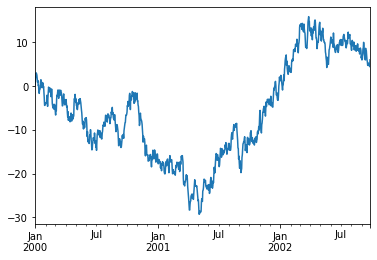

In [206]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels

In [207]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,1.531357,-0.275996,-0.326205,-1.928131
2000-01-02,-0.453256,2.931851,0.693042,-0.257563
2000-01-03,-0.271596,-0.505707,0.322370,1.843459
2000-01-04,-1.412609,0.586835,-0.413577,0.204276
2000-01-05,1.309391,1.364492,1.346545,-0.085575
...,...,...,...,...
2002-09-22,0.372011,0.325597,0.124829,1.015046
2002-09-23,-0.712602,3.636603,-1.218365,-0.347443
2002-09-24,0.500409,1.973688,0.110723,0.870195
2002-09-25,-0.690489,-0.758068,-0.589014,-0.499599


In [210]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,1.531357,-0.275996,-0.326205,-1.928131
2000-01-02,2.609459,2.379860,0.040633,-4.113825
2000-01-03,3.415964,4.530008,0.729840,-4.456059
2000-01-04,2.809861,7.266991,1.005471,-4.594017
2000-01-05,3.513148,11.368467,2.627647,-4.817550
...,...,...,...,...
2002-09-22,4377.783316,9109.462451,-3936.678954,-6996.516530
2002-09-23,4375.742531,9122.268318,-3932.663036,-6999.251584
2002-09-24,4374.202156,9137.047875,-3928.536396,-7001.116443
2002-09-25,4371.971292,9151.069362,-3924.998770,-7003.480902


<Figure size 432x288 with 0 Axes>

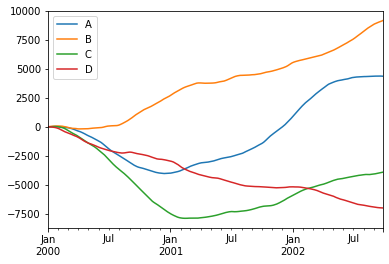

In [212]:
plt.figure()
df.plot()
plt.legend(loc='best')